<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>
<h1><center>Personalized Investment Project</center></h1>


<center><img src="https://cdn.pixabay.com/photo/2017/09/07/08/54/money-2724241__480.jpg" width="1000" height="600"></center>

<b><h2><center>Trade&Ahead Fin Co</center></h2></b>

# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer, KNNImputer

# To remove the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# To set the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# setting the precision of floating numbers to 2 decimal points
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# To compute distances
from scipy.spatial.distance import cdist, pdist

# To perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/content/stock_data.csv")

In [97]:
df = data.copy()

In [4]:
df

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.35,10.00,1.69,135,51,-604000000,7610000000,11.39,668129938.50,3.72,-8.78
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.24,8.34,2.20,130,77,51000000,5144000000,3.15,1633015873.00,18.81,-8.75
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.91,11.30,1.27,21,67,938000000,4423000000,2.94,1504421769.00,15.28,-0.39
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.94,13.98,1.36,9,180,-240840000,629551000,1.26,499643650.80,74.56,4.20
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.32,-1.83,1.70,14,272,315120000,696878000,0.31,2247993548.00,178.45,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.26,14.89,1.85,15,459,-1032187000,-4359082000,-4.64,939457327.60,28.98,6.26
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.52,-8.70,1.48,142,27,159000000,1293000000,2.97,435353535.40,17.68,-3.84
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.59,9.35,1.40,1,100,376000000,147000000,0.78,188461538.50,131.53,-23.88
338,ZION,Zions Bancorp,Financials,Regional Banks,27.30,-1.16,1.47,4,99,-43623000,309471000,1.20,257892500.00,22.75,-0.06


## Data Overview

- Observations
- Sanity checks

In [5]:
df.shape

(340, 15)

* There are 15 features and 340 observations in the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

* There are 11 numerical columns and 4 object type columns 
* The feature column types appear to be as expected
* There appears to be no missing values

In [7]:
df.duplicated().sum()

0

* There are no duplicated observations

In [8]:
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

* There are no missing values

In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.00,NaN,NaN,NaN,80.86,98.06,4.50,38.55,59.70,92.88,1274.95
Price Change,340.00,NaN,NaN,NaN,4.08,12.01,-47.13,-0.94,4.82,10.70,55.05
Volatility,340.00,NaN,NaN,NaN,1.53,0.59,0.73,1.13,1.39,1.70,4.58
ROE,340.00,NaN,NaN,NaN,39.60,96.55,1.00,9.75,15.00,27.00,917.00
Cash Ratio,340.00,NaN,NaN,NaN,70.02,90.42,0.00,18.00,47.00,99.00,958.00
Net Cash Flow,340.00,NaN,NaN,NaN,55537620.59,1946365312.18,-11208000000.00,-193906500.00,2098000.00,169810750.00,20764000000.00


* The `Ticker Symbol` column is unique identifer and will be dropped
* The `Security` column is also unique as there is only one company name per observation 
* The `Industrials` economic sector has the most number of securities with 53 companies
* The `Oil & Gas Exploration & Production` sub-industry group has the most number of securities with 16 companies
* The average stock price of securities is \$80.86 while the median stock price is \$59.70. The distribution appears to be right skewed

* `Price Change` appears to be normally distrinuted with a mean of \$4.08 and median price change of \$4.82. It also appears to be slightly right-skewed

* The average volatility of price over 13 weeks per stock is 1.53 while the median is 1.39. The data appears to be right-skewed 

* The average return on equity is \$39.60 while the median is \$15.00. The lowest ROE is \$1 while the highest is \$917
* The average cash ratio is 70.02 while the median is 47.00. The lowest cash ratio is 0 suggesting that some companies do not have cash reserve and are not able to pay short-term liabilities. The highest is 958 with the most ability to pay-off short-term liabilities 

* The average net cash flow is \$55.6m while the median is \$2.1m suggesting that most companies have healhty cash flows. However, this does not apply to all companies as the lowest net cash flow is -(\$11.2b) showing the company is making losses or running in deficit. The highest is \$20.7b

* The average ne income is \$1.5b while the median income is \$707m. The data is right-skewed. Th lowest net income is -(\$23.5b) which represnt the highest losses. The highest net income is \$24.4b

* The average earnings per share is 2.78 while the median is 2.90. The data is slightly left-skewed. The lowest is -61.20 which may be because of company income losses while the highest is 50.09

* The average `Estimated Shares Outstanding` is 577.03 million while the median is 309.67 million. This is difficult to interprete without the context of each company 
The highest net income is \$24.4b

* The average earnings per share is 2.78 while the median is 2.90. The data is slightly left-skewed. The lowest is -61.20 which may be because of company income losses while the highest is 50.09

* The average `Estimated Shares Outstanding` is 577.03 million while the median is 309.67 million. This is difficult to interprete without the context of each company 

verage earnings per share is 2.78 while the median is 2.90. The data is slightly left-skewed. The lowest is -61.20 which may be because of company income losses while the highest is 50.09

* The average `Estimated Shares Outstanding` is 577.03 million while the median is 309.67 million. This is difficult to interprete without the context of each company 

* The average `P/E Ratio` is 32.61 while the median is 20.82. The data is right-skewed meaning that more companies are less overvalued than the average

* The average `P/B Ratio` is -1.72 while the median value is -1.07. It is widely accepted that negative P/B ratios indicate that the stock may be undervalued. As the data is right-skewed it can be infered that that more stocks are undervalued despite earnings or stock price. 

* The lowest and the highest P/B ratios are -76.12 and 129.06 respectively representing the most undervalued and the most overvalued stocks



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [10]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
       data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

In [12]:
df[df['Current Price']>1200]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
243,PCLN,Priceline.com Inc,Consumer Discretionary,Internet & Direct Marketing Retail,1274.95,3.19,1.27,29,184,-1671386000,2551360000,50.09,50935516.07,25.45,-1.05


In [13]:
df[df['Price Change']>40]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
136,FSLR,First Solar Inc,Information Technology,Semiconductors,65.99,55.05,2.08,10,190,-355228000,546421000,5.42,100815682.70,12.18,22.56


In [14]:
df[df['Volatility']>4]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
62,CHK,Chesapeake Energy,Energy,Integrated Oil & Gas,4.50,-38.10,4.56,687,22,-3283000000,-14685000000,-22.43,654703522.10,28.41,-1.84
284,SWN,Southwestern Energy,Energy,Oil & Gas Exploration & Production,7.11,-44.80,4.58,200,2,-38000000,-4556000000,-6.07,402141680.40,93.09,1.27


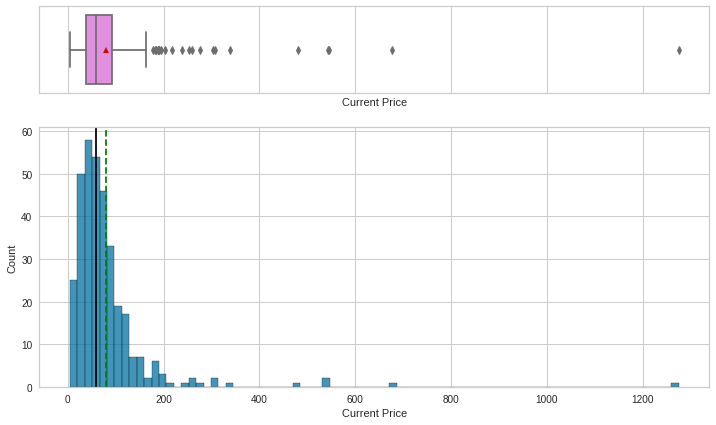

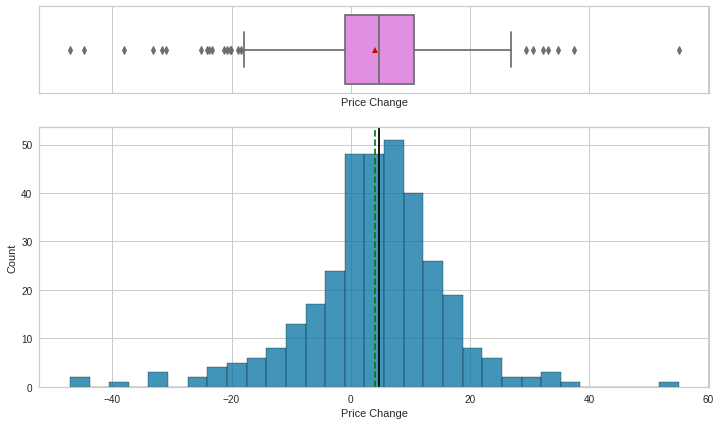

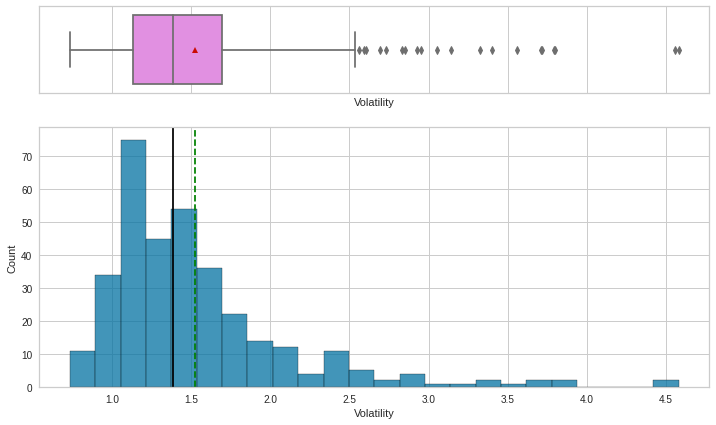

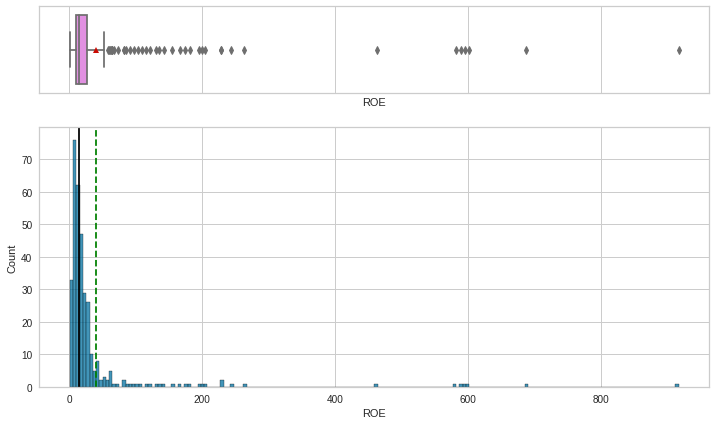

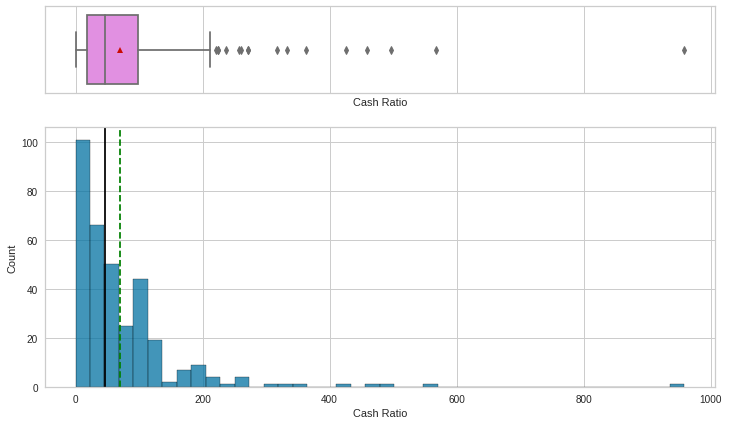

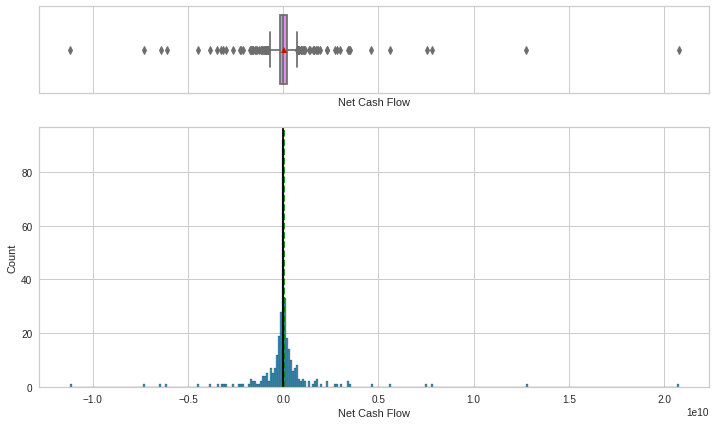

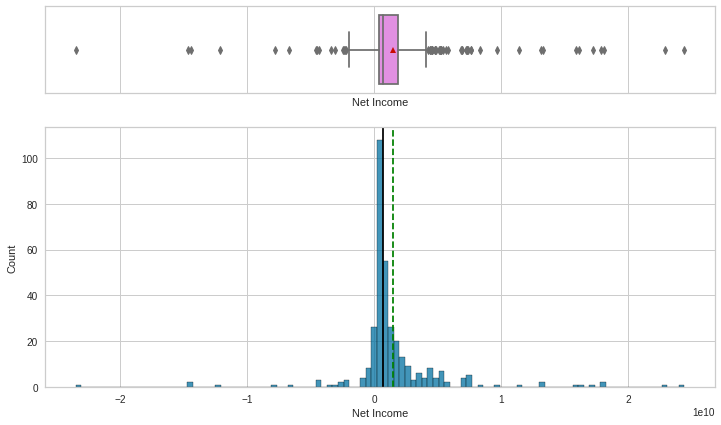

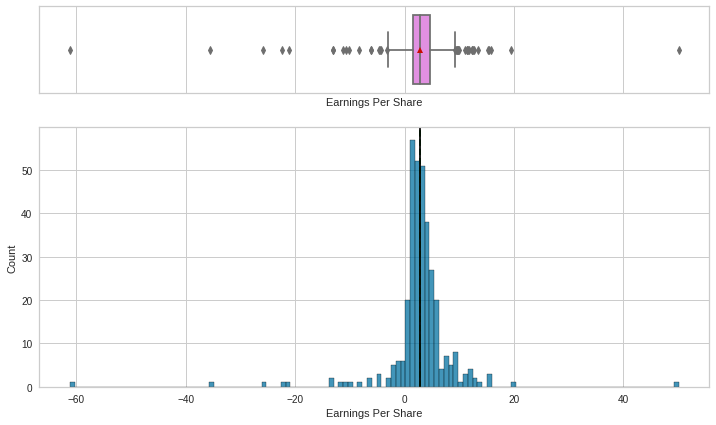

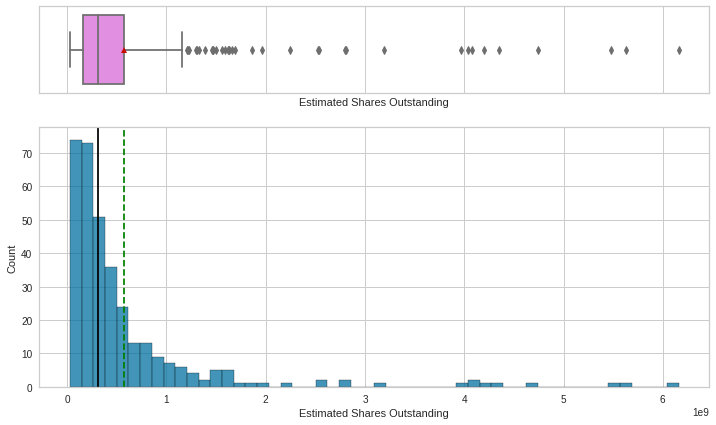

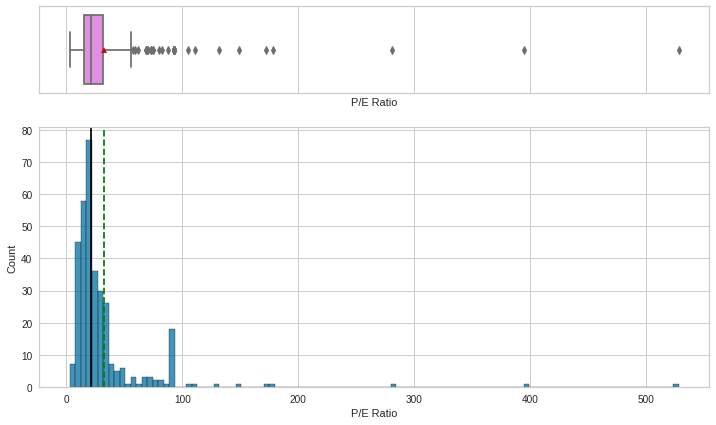

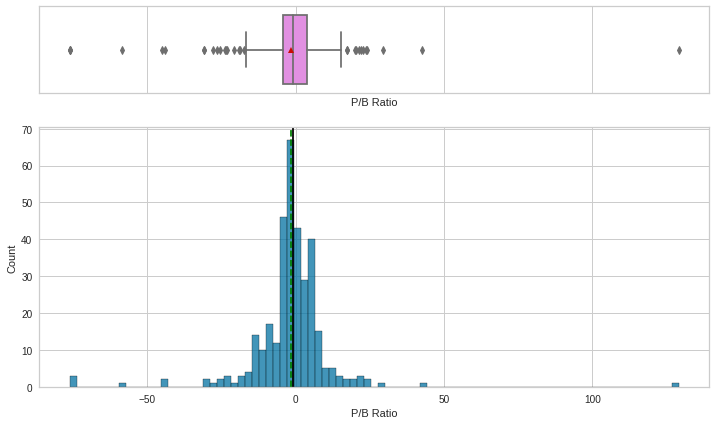

In [15]:
for feature in df.select_dtypes(include=np.number).columns.tolist():
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

* There are a number of outliers that require closer inspection in all the columns however, it is difficult to interpret if each individual observations are valid or not.

* Most of the distributions are normally distributed with the exception of `Current Price`, `ROE`, `Cash Ratio` and `Estimated Shares Outstanding`. 

* `Volatility`, `Net Income`, `P/E Ratio` and `P/B Ratio` are all right-skewed while `Price Change` is left skewed among the normally distributed data

* All the non-normally distributed data - `Current Price`, `ROE`, `Cash Ratio` and `Estimated Shares Outstanding`- are all right skewed.

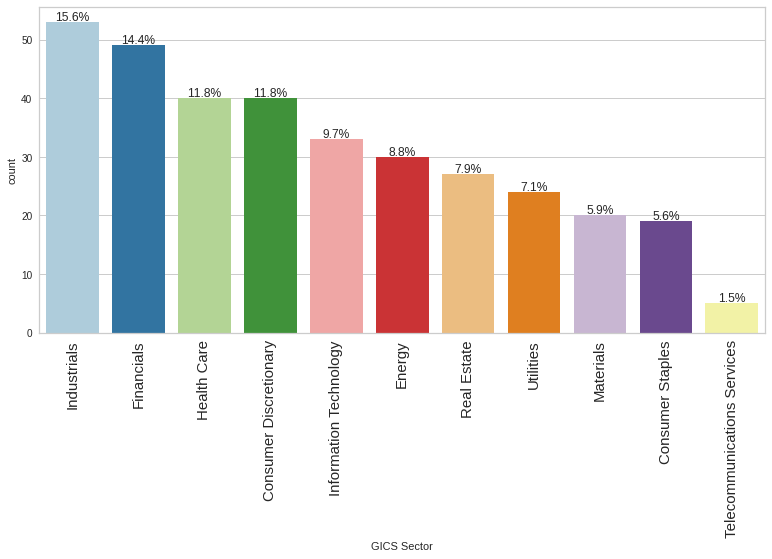

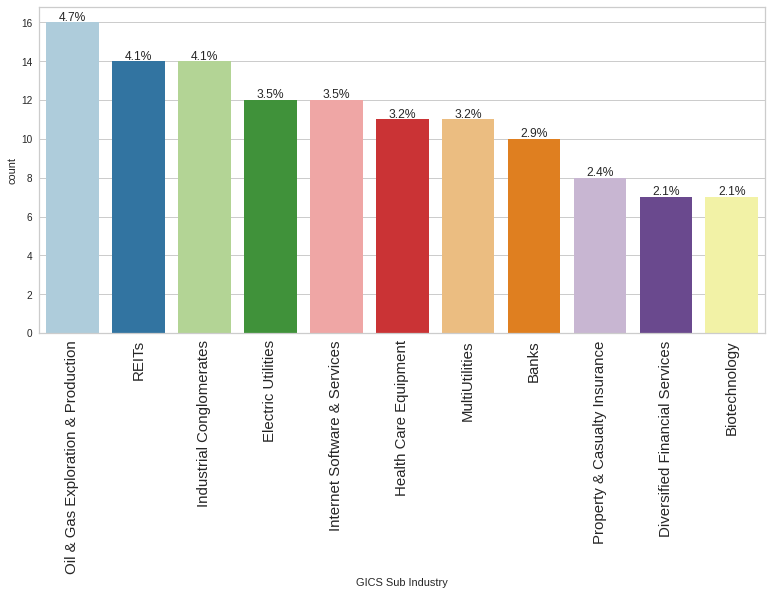

In [16]:
obj_col = ["GICS Sector", "GICS Sub Industry"]

for item in obj_col:
    labeled_barplot(df, item, perc=True, n=11)

* The `Industrial` sector has the most number of companies followed by `Financials`, `Healthcare` and `Consumer Discretionary` with 15.6%, 14.4%, 11.8% and 11.8% respectively of all the companies.
* `Telecommunication Services` have the least with just 1.5% of the companies
* `Oil & Gas Exploration & Production` sub-industry has the the most companies with 4.7%. 
* The top 10 sub-industries are account for 33.7% of all the companies


### Bivariate Analysis

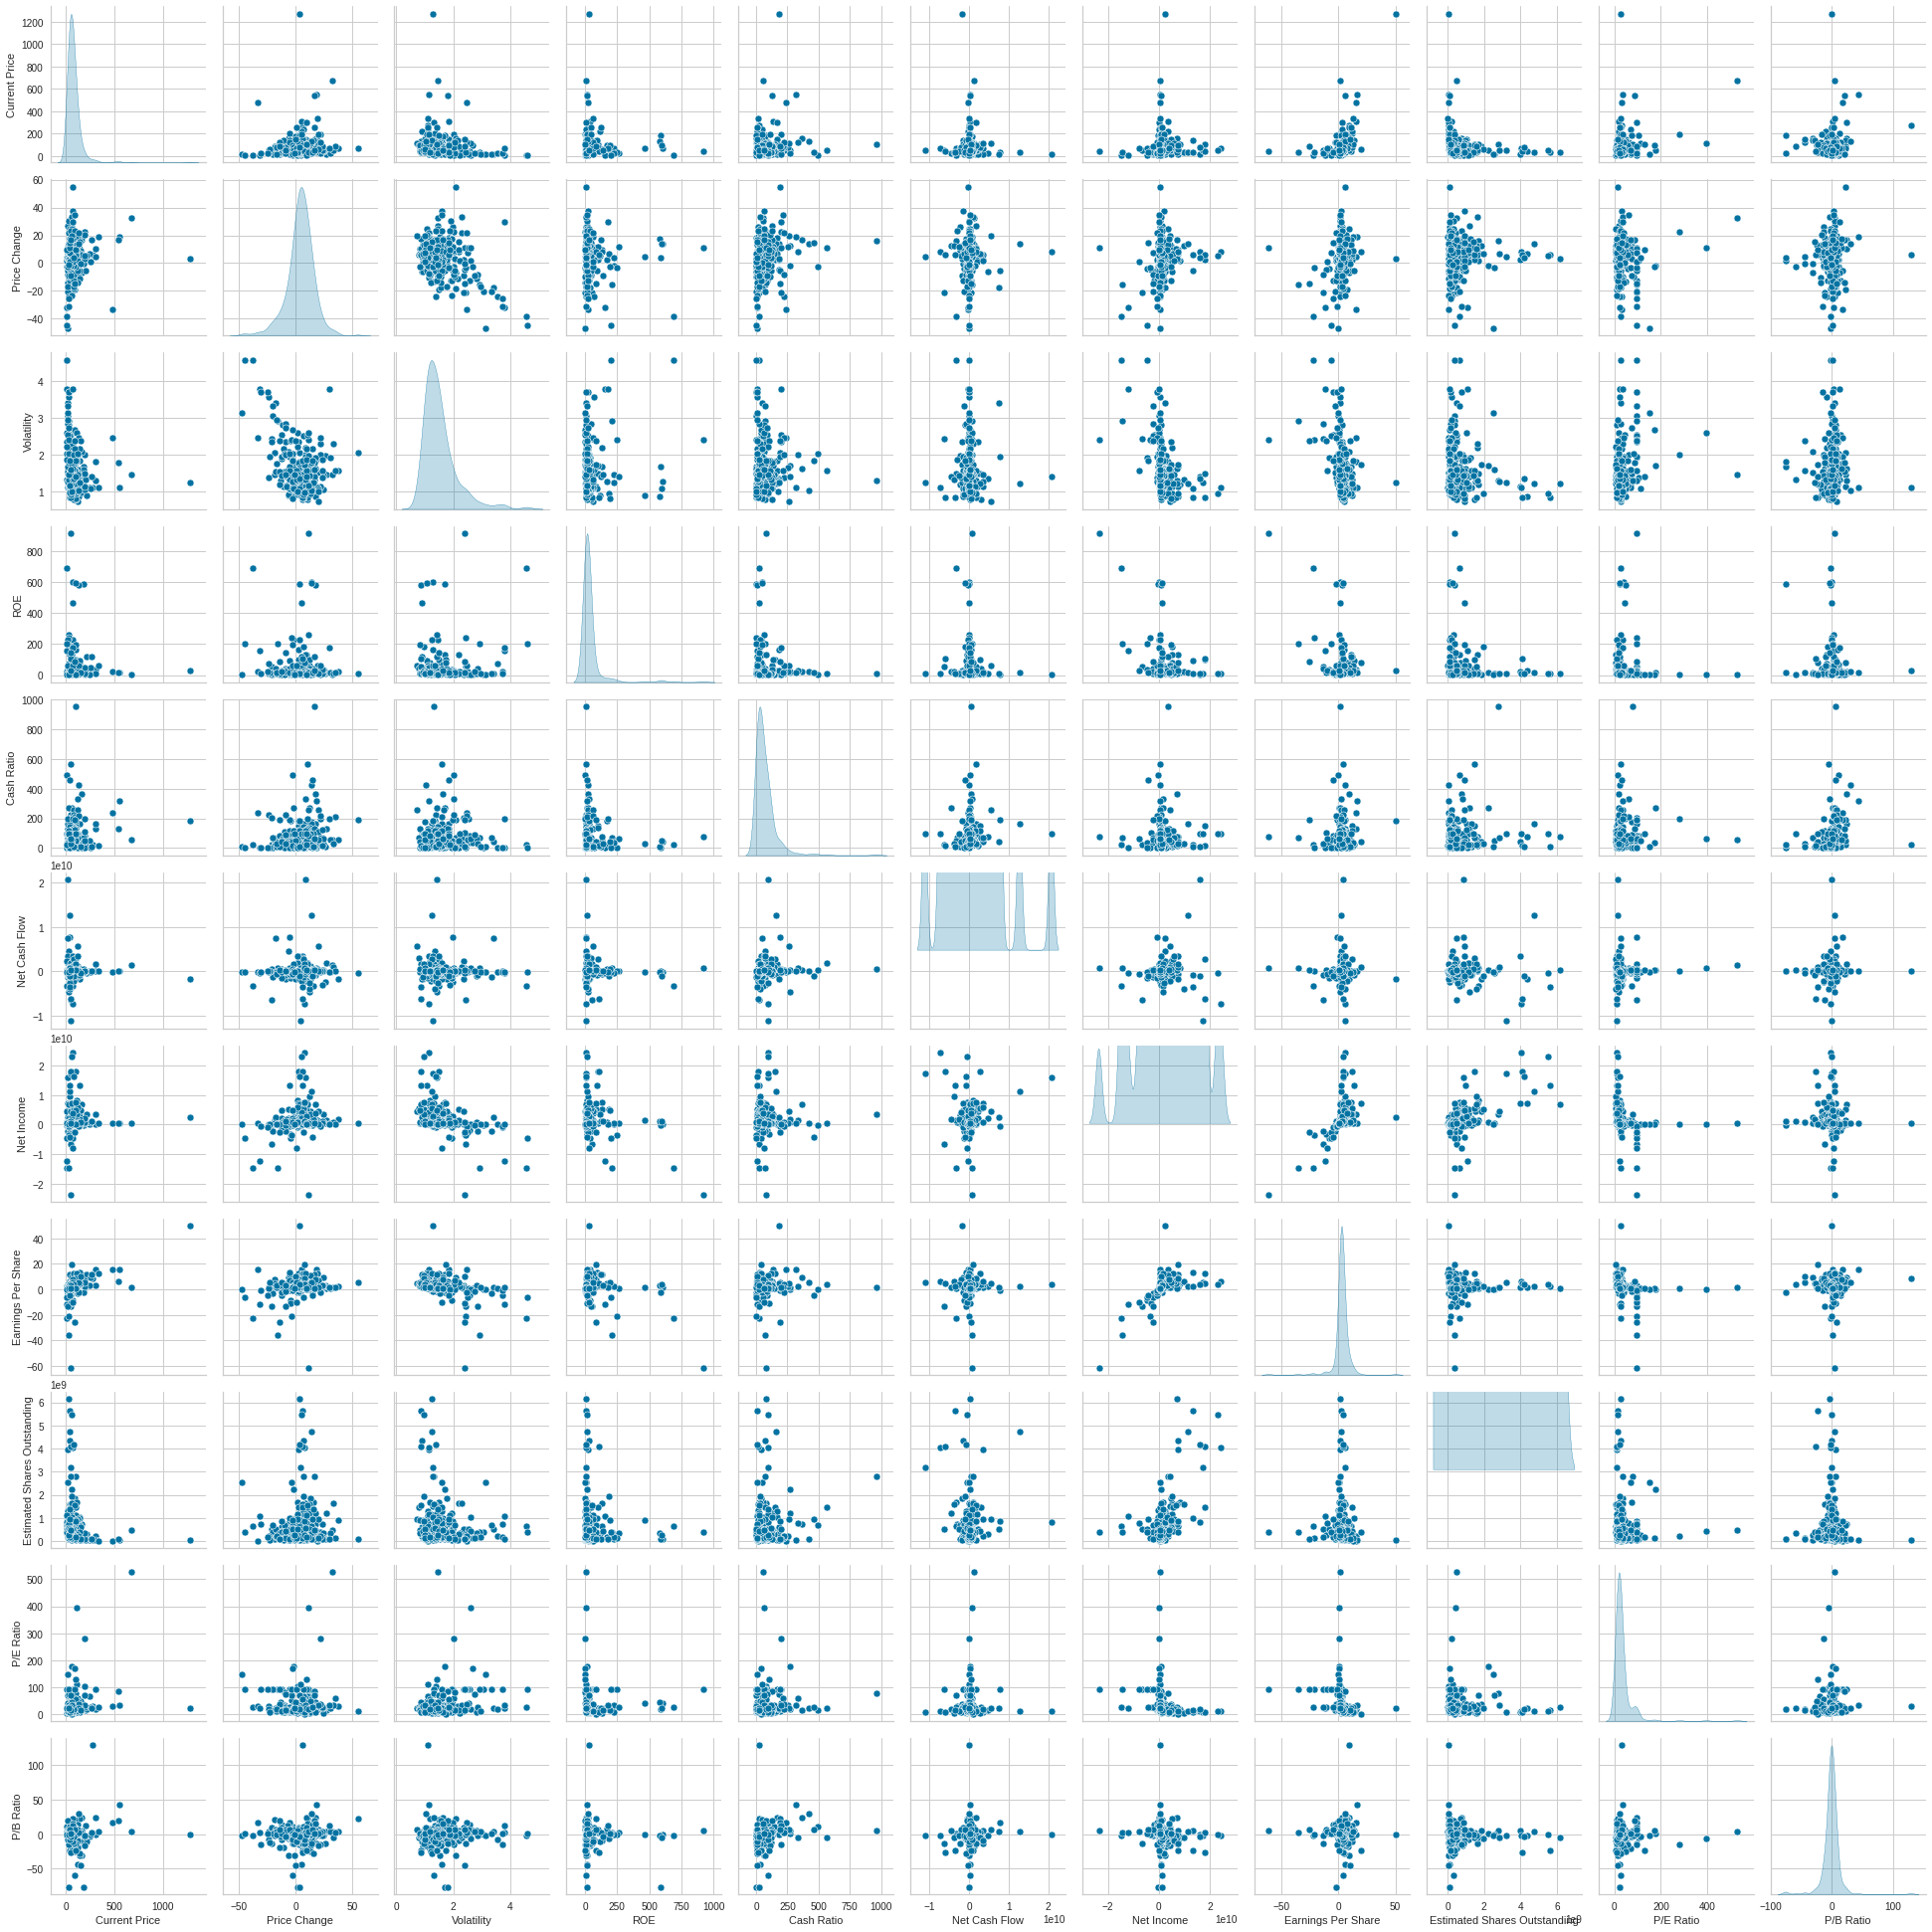

In [17]:
sns.pairplot(df.select_dtypes(include=np.number), diag_kind='kde')

* **From the diagonal of the pairplot 4 clusters are observed with `Net Income` and `Net Cash Flow` which are the most**


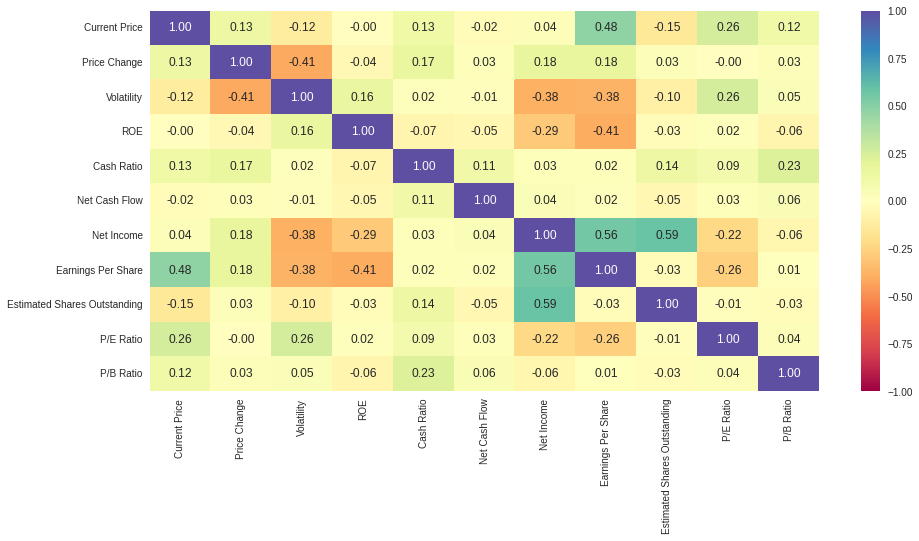

In [18]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.select_dtypes(include=np.number).corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* `Net Income` is most correlated with `Estimated Shares Outstanding` and `Earnings Per Share`. The higher the net income the higher the more likely estimated share outstanding are high and the earnings per share will increase

* `Earnings Per Share` is positively correlated to `Current Price`. Meaning the higher the earnings per share the more likely the current price will increase or be high

* Conversely, the higher the price change the lower the price volatility

* Also the higher the earnings per share the lower the returns on equity (`ROE`)

## Data Preprocessing

- Outlier check
- scaling the data
- column name pre-processing

### Outlier treatment

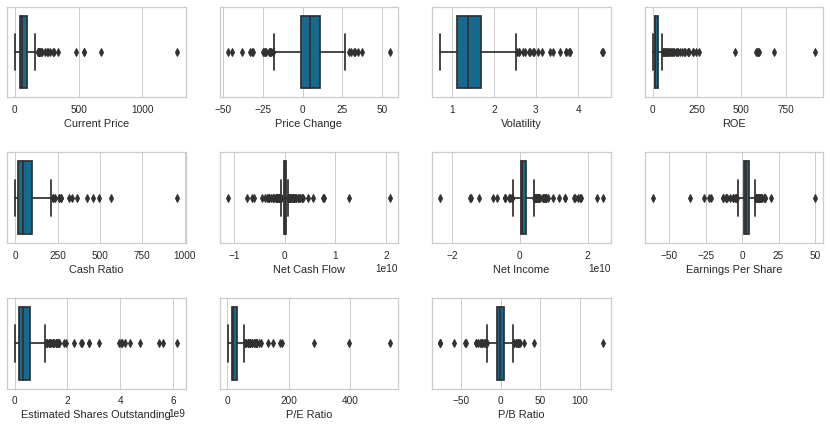

In [100]:
# outlier detection before treatment
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 8))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [101]:
# Current prices greater than $600
df[df['Current Price'] > 600]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
26,AMZN,Amazon.com Inc,Consumer Discretionary,Internet & Direct Marketing Retail,675.89,32.27,1.46,4,58,1333000000,596000000,1.28,465625000.00,528.04,3.90
243,PCLN,Priceline.com Inc,Consumer Discretionary,Internet & Direct Marketing Retail,1274.95,3.19,1.27,29,184,-1671386000,2551360000,50.09,50935516.07,25.45,-1.05


In [102]:
# To cap the upper limit of current prices
df['Current Price'] = np.where((df['Current Price'] > 675.89),675.89,df['Current Price'])
df[df['Current Price'] > 600]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
26,AMZN,Amazon.com Inc,Consumer Discretionary,Internet & Direct Marketing Retail,675.89,32.27,1.46,4,58,1333000000,596000000,1.28,465625000.00,528.04,3.90
243,PCLN,Priceline.com Inc,Consumer Discretionary,Internet & Direct Marketing Retail,675.89,3.19,1.27,29,184,-1671386000,2551360000,50.09,50935516.07,25.45,-1.05


In [103]:
# Price change greater than 37
df[df['Price Change'] > 37]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
87,DD,Du Pont (E.I.),Materials,Diversified Chemicals,66.60,37.49,1.58,20,60,-1610000000,1953000000,2.17,900000000.00,30.69,3.25
136,FSLR,First Solar Inc,Information Technology,Semiconductors,65.99,55.05,2.08,10,190,-355228000,546421000,5.42,100815682.70,12.18,22.56


In [104]:
# To cap the upper limit of price changes 
df['Price Change'] = np.where((df['Price Change'] > 37.49),37.49,df['Price Change'])
df[df['Price Change'] > 37]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
87,DD,Du Pont (E.I.),Materials,Diversified Chemicals,66.60,37.49,1.58,20,60,-1610000000,1953000000,2.17,900000000.00,30.69,3.25
136,FSLR,First Solar Inc,Information Technology,Semiconductors,65.99,37.49,2.08,10,190,-355228000,546421000,5.42,100815682.70,12.18,22.56


In [105]:
# Volatility greater than 3.7
df[df['Volatility'] > 3.7]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
62,CHK,Chesapeake Energy,Energy,Integrated Oil & Gas,4.50,-38.10,4.56,687,22,-3283000000,-14685000000,-22.43,654703522.10,28.41,-1.84
127,FCX,Freeport-McMoran Cp & Gld,Materials,Copper,6.77,-31.69,3.80,155,5,-240000000,-12156000000,-11.31,1074801061.00,22.81,2.94
267,RRC,Range Resources Corp.,Energy,Oil & Gas Exploration & Production,24.61,-25.11,3.71,26,0,23000,-713685000,-4.29,166360139.90,93.09,0.53
284,SWN,Southwestern Energy,Energy,Oil & Gas Exploration & Production,7.11,-44.80,4.58,200,2,-38000000,-4556000000,-6.07,402141680.40,93.09,1.27
323,WMB,Williams Cos.,Energy,Oil & Gas Exploration & Production,25.70,-30.99,3.72,9,4,-140000000,-571000000,-0.76,751315789.50,93.09,-14.56
327,WYNN,Wynn Resorts Ltd,Consumer Discretionary,Casinos & Gaming,69.19,29.50,3.79,174,198,-102075000,195290000,1.93,101186528.50,35.85,12.70


In [106]:
# To cap the upper limit of volatility 
df['Volatility'] = np.where((df['Volatility'] > 3.80),3.80,df['Volatility'])
df[df['Volatility'] > 3.7]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
62,CHK,Chesapeake Energy,Energy,Integrated Oil & Gas,4.50,-38.10,3.80,687,22,-3283000000,-14685000000,-22.43,654703522.10,28.41,-1.84
127,FCX,Freeport-McMoran Cp & Gld,Materials,Copper,6.77,-31.69,3.80,155,5,-240000000,-12156000000,-11.31,1074801061.00,22.81,2.94
267,RRC,Range Resources Corp.,Energy,Oil & Gas Exploration & Production,24.61,-25.11,3.71,26,0,23000,-713685000,-4.29,166360139.90,93.09,0.53
284,SWN,Southwestern Energy,Energy,Oil & Gas Exploration & Production,7.11,-44.80,3.80,200,2,-38000000,-4556000000,-6.07,402141680.40,93.09,1.27
323,WMB,Williams Cos.,Energy,Oil & Gas Exploration & Production,25.70,-30.99,3.72,9,4,-140000000,-571000000,-0.76,751315789.50,93.09,-14.56
327,WYNN,Wynn Resorts Ltd,Consumer Discretionary,Casinos & Gaming,69.19,29.50,3.79,174,198,-102075000,195290000,1.93,101186528.50,35.85,12.70


In [107]:
# ROE greater than 300
df[df['ROE'] > 300]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
18,ALLE,Allegion,Industrials,Building Products,65.92,13.75,1.28,601,45,-90800000,153900000,1.60,96187500.00,41.20,-0.88
30,APA,Apache Corporation,Energy,Oil & Gas Exploration & Production,44.47,11.40,2.41,917,80,698000000,-23528000000,-61.20,384444444.40,93.09,4.97
62,CHK,Chesapeake Energy,Energy,Integrated Oil & Gas,4.50,-38.10,3.80,687,22,-3283000000,-14685000000,-22.43,654703522.10,28.41,-1.84
64,CHTR,Charter Communications,Consumer Discretionary,Cable & Satellite,183.10,3.60,1.70,589,0,2000000,-271000000,-2.43,111522633.70,20.82,-76.12
67,CL,Colgate-Palmolive,Consumer Staples,Household Products,66.62,4.78,0.90,463,27,-119000000,1384000000,1.53,904575163.40,43.54,-0.55
179,KMB,Kimberly-Clark,Consumer Staples,Household Products,127.30,17.51,0.87,582,10,-170000000,1013000000,2.78,364388489.20,45.79,-2.53
278,SPGI,"S&P Global, Inc.",Financials,Diversified Financial Services,98.58,14.04,1.08,596,51,-1016000000,1156000000,4.26,271361502.30,23.14,-4.18


In [108]:
# To cap the upper limit of ROE
df['ROE'] = np.where((df['ROE'] > 300),300,df['ROE'])
df[df['ROE'] > 300]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio


In [109]:
# Cash ratio greater than 560
df[df['Cash Ratio'] > 560]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
125,FB,Facebook,Information Technology,Internet Software & Services,104.66,16.22,1.32,8,958,592000000,3669000000,1.31,2800763359.00,79.89,5.88
211,MNST,Monster Beverage,Consumer Staples,Soft Drinks,49.65,10.80,1.59,11,568,1805094000,546733000,3.71,1469541779.00,25.42,-5.19


In [110]:
# To cap the upper limit of cash ratio
df['Cash Ratio'] = np.where((df['Cash Ratio'] > 560),568,df['Cash Ratio'])
df[df['Cash Ratio'] > 560]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
125,FB,Facebook,Information Technology,Internet Software & Services,104.66,16.22,1.32,8,568,592000000,3669000000,1.31,2800763359.00,79.89,5.88
211,MNST,Monster Beverage,Consumer Staples,Soft Drinks,49.65,10.80,1.59,11,568,1805094000,546733000,3.71,1469541779.00,25.42,-5.19


In [111]:
# Net cash flow greater than 6000000000
df[df['Net Cash Flow'] > 6000000000]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
40,BAC,Bank of America Corp,Financials,Banks,16.83,8.44,1.42,6,99,20764000000,15888000000,4.18,845069512.20,13.00,-0.94
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.04,-5.10,1.97,4,189,7786000000,-671000000,-0.79,849367088.60,93.09,17.35
157,HPE,Hewlett Packard Enterprise,Information Technology,"Technology Hardware, Storage & Peripherals",15.20,-17.84,3.40,7,45,7523000000,2461000000,1.80,513987730.10,25.31,3.95
167,INTC,Intel Corp.,Information Technology,Semiconductors,34.45,14.04,1.23,19,162,12747000000,11420000000,2.41,4738589212.00,14.29,3.95


In [112]:
# To cap the upper limit of net cash flow
df['Net Cash Flow'] = np.where((df['Net Cash Flow'] > 7786000000),7786000000,df['Net Cash Flow'])
df[df['Net Cash Flow'] > 6000000000]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
40,BAC,Bank of America Corp,Financials,Banks,16.83,8.44,1.42,6,99,7786000000,15888000000,4.18,845069512.20,13.00,-0.94
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.04,-5.10,1.97,4,189,7786000000,-671000000,-0.79,849367088.60,93.09,17.35
157,HPE,Hewlett Packard Enterprise,Information Technology,"Technology Hardware, Storage & Peripherals",15.20,-17.84,3.40,7,45,7523000000,2461000000,1.80,513987730.10,25.31,3.95
167,INTC,Intel Corp.,Information Technology,Semiconductors,34.45,14.04,1.23,19,162,7786000000,11420000000,2.41,4738589212.00,14.29,3.95


In [113]:
# Net cash flow less than -6000000000
df[df['Net Cash Flow'] < -6000000000]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
31,APC,Anadarko Petroleum Corp,Energy,Oil & Gas Exploration & Production,48.58,-20.80,2.44,52,22,-6430000000,-6692000000,-13.18,507738998.50,93.09,-12.86
52,C,Citigroup Inc.,Financials,Banks,51.75,4.71,1.26,8,99,-11208000000,17242000000,5.41,3187060998.00,9.57,-1.17
177,JPM,JPMorgan Chase & Co.,Financials,Banks,66.03,8.03,1.13,10,99,-7341000000,24442000000,6.05,4040000000.00,10.91,-1.89
317,VZ,Verizon Communications,Telecommunications Services,Integrated Telecommunications Services,46.22,6.28,0.84,109,14,-6128000000,17879000000,4.38,4081963470.00,10.55,-26.38


In [114]:
# To cap the lower limit of net cash flow
df['Net Cash Flow'] = np.where((df['Net Cash Flow'] < -7341000000),-7341000000,df['Net Cash Flow'])
df[df['Net Cash Flow'] < -6000000000]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
31,APC,Anadarko Petroleum Corp,Energy,Oil & Gas Exploration & Production,48.58,-20.80,2.44,52,22,-6430000000,-6692000000,-13.18,507738998.50,93.09,-12.86
52,C,Citigroup Inc.,Financials,Banks,51.75,4.71,1.26,8,99,-7341000000,17242000000,5.41,3187060998.00,9.57,-1.17
177,JPM,JPMorgan Chase & Co.,Financials,Banks,66.03,8.03,1.13,10,99,-7341000000,24442000000,6.05,4040000000.00,10.91,-1.89
317,VZ,Verizon Communications,Telecommunications Services,Integrated Telecommunications Services,46.22,6.28,0.84,109,14,-6128000000,17879000000,4.38,4081963470.00,10.55,-26.38


In [115]:
# Net income less than -14000000000
df[df['Net Income'] < -14000000000]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
30,APA,Apache Corporation,Energy,Oil & Gas Exploration & Production,44.47,11.40,2.41,300,80,698000000,-23528000000,-61.20,384444444.40,93.09,4.97
62,CHK,Chesapeake Energy,Energy,Integrated Oil & Gas,4.50,-38.10,3.80,300,22,-3283000000,-14685000000,-22.43,654703522.10,28.41,-1.84
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.00,-15.48,2.92,205,70,830000000,-14454000000,-35.55,406582278.50,93.09,1.79


In [116]:
# To cap the lower limit of net income
df['Net Income'] = np.where((df['Net Income'] < -14685000000), -14685000000,df['Net Income'])
df[df['Net Income'] < -14000000000]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
30,APA,Apache Corporation,Energy,Oil & Gas Exploration & Production,44.47,11.40,2.41,300,80,698000000,-14685000000,-61.20,384444444.40,93.09,4.97
62,CHK,Chesapeake Energy,Energy,Integrated Oil & Gas,4.50,-38.10,3.80,300,22,-3283000000,-14685000000,-22.43,654703522.10,28.41,-1.84
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.00,-15.48,2.92,205,70,830000000,-14454000000,-35.55,406582278.50,93.09,1.79


In [117]:
# Earnings per share greater than 18
df[df['Earnings Per Share'] > 18]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
243,PCLN,Priceline.com Inc,Consumer Discretionary,Internet & Direct Marketing Retail,675.89,3.19,1.27,29,184,-1671386000,2551360000,50.09,50935516.07,25.45,-1.05
301,UAL,United Continental Holdings,Industrials,Airlines,57.30,8.22,1.75,82,42,1004000000,7340000000,19.52,376024590.20,2.94,-23.20


In [118]:
# Earnings per share less than -35
df[df['Earnings Per Share'] < -35]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
30,APA,Apache Corporation,Energy,Oil & Gas Exploration & Production,44.47,11.40,2.41,300,80,698000000,-14685000000,-61.20,384444444.40,93.09,4.97
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.00,-15.48,2.92,205,70,830000000,-14454000000,-35.55,406582278.50,93.09,1.79


In [119]:
# To cap the upper & lower limit of earnings per share
df['Earnings Per Share'] = np.where((df['Earnings Per Share'] > 19.52), 19.52, df['Earnings Per Share'])
df['Earnings Per Share'] = np.where((df['Earnings Per Share'] < -35.55), -35.55, df['Earnings Per Share'])


In [120]:
# P/E Ratio greater than 170
df[df['P/E Ratio'] > 170]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.32,-1.83,1.70,14,272,315120000,696878000,0.31,2247993548.00,178.45,1.06
19,ALXN,Alexion Pharmaceuticals,Health Care,Biotechnology,190.75,22.34,2.02,2,195,66000000,144000000,0.68,211764705.90,280.51,-14.17
26,AMZN,Amazon.com Inc,Consumer Discretionary,Internet & Direct Marketing Retail,675.89,32.27,1.46,4,58,1333000000,596000000,1.28,465625000.00,528.04,3.90
84,CXO,Concho Resources,Energy,Oil & Gas Exploration & Production,92.86,-2.74,2.69,1,38,228529000,65900000,0.54,122037037.00,171.96,5.67
226,NFLX,Netflix Inc.,Information Technology,Internet Software & Services,114.38,11.15,2.61,6,65,695722000,122641000,0.29,422900000.00,394.41,-5.70


In [121]:
# To cap the upper limit of P/E Ratio
df['P/E Ratio'] = np.where((df['P/E Ratio'] > 178.45),178.45,df['P/E Ratio'])
df[df['P/E Ratio'] > 170]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.32,-1.83,1.70,14,272,315120000,696878000,0.31,2247993548.00,178.45,1.06
19,ALXN,Alexion Pharmaceuticals,Health Care,Biotechnology,190.75,22.34,2.02,2,195,66000000,144000000,0.68,211764705.90,178.45,-14.17
26,AMZN,Amazon.com Inc,Consumer Discretionary,Internet & Direct Marketing Retail,675.89,32.27,1.46,4,58,1333000000,596000000,1.28,465625000.00,178.45,3.90
84,CXO,Concho Resources,Energy,Oil & Gas Exploration & Production,92.86,-2.74,2.69,1,38,228529000,65900000,0.54,122037037.00,171.96,5.67
226,NFLX,Netflix Inc.,Information Technology,Internet Software & Services,114.38,11.15,2.61,6,65,695722000,122641000,0.29,422900000.00,178.45,-5.70


In [122]:
# P/B Ratio greater than 40
df[df['P/B Ratio'] > 40]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
6,ADS,Alliance Data Systems,Information Technology,Data Processing & Outsourced Services,276.57,6.19,1.12,30,25,90885000,596541000,8.91,66951851.85,31.04,129.06
171,ISRG,Intuitive Surgical Inc.,Health Care,Health Care Equipment,546.16,18.73,1.13,14,317,114300000,588800000,15.87,37101449.28,34.41,42.61


In [123]:
# To cap the upper limit of P/B Ratio
df['P/B Ratio'] = np.where((df['P/B Ratio'] > 42.61),42.61,df['P/B Ratio'])
df[df['P/B Ratio'] > 40]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
6,ADS,Alliance Data Systems,Information Technology,Data Processing & Outsourced Services,276.57,6.19,1.12,30,25,90885000,596541000,8.91,66951851.85,31.04,42.61
171,ISRG,Intuitive Surgical Inc.,Health Care,Health Care Equipment,546.16,18.73,1.13,14,317,114300000,588800000,15.87,37101449.28,34.41,42.61


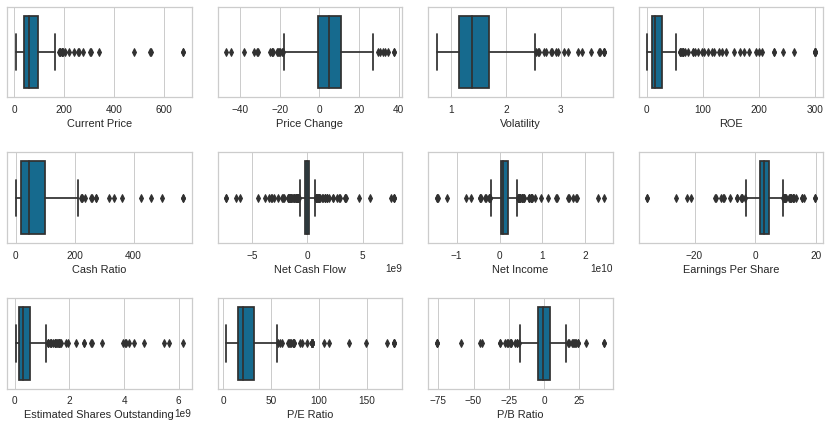

In [124]:
# outlier detection after treatment
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 8))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

* The outliers have been successfully treated

### Scaling the data

In [125]:
stockDataAttr=df.iloc[:,4:]
stockDataAttr.head(3)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,42.35,10.00,1.69,135,51,-604000000,7610000000,11.39,668129938.50,3.72,-8.78
1,59.24,8.34,2.20,130,77,51000000,5144000000,3.15,1633015873.00,18.81,-8.75
2,44.91,11.30,1.27,21,67,938000000,4423000000,2.94,1504421769.00,15.28,-0.39


In [126]:
# Standardizing the data
stockDataScaled=stockDataAttr.apply(zscore)
stockDataScaled.head(3)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.46,0.51,0.29,1.86,-0.22,-0.42,1.60,1.58,0.11,-0.92,-0.56
1,-0.25,0.37,1.19,1.77,0.10,0.02,0.95,0.07,1.25,-0.40,-0.55
2,-0.43,0.62,-0.43,-0.21,-0.02,0.63,0.76,0.03,1.10,-0.53,0.13


## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.7322293439614045
Number of Clusters: 2 	Average Distortion: 2.548340146783
Number of Clusters: 3 	Average Distortion: 2.4344083645188643
Number of Clusters: 4 	Average Distortion: 2.329080983756407
Number of Clusters: 5 	Average Distortion: 2.271497179592594
Number of Clusters: 6 	Average Distortion: 2.1811484439364666
Number of Clusters: 7 	Average Distortion: 2.1129348127664023
Number of Clusters: 8 	Average Distortion: 2.059823804293742
Number of Clusters: 9 	Average Distortion: 1.9956348295148847
Number of Clusters: 10 	Average Distortion: 1.9354318358748186
Number of Clusters: 11 	Average Distortion: 1.9132013667867043


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

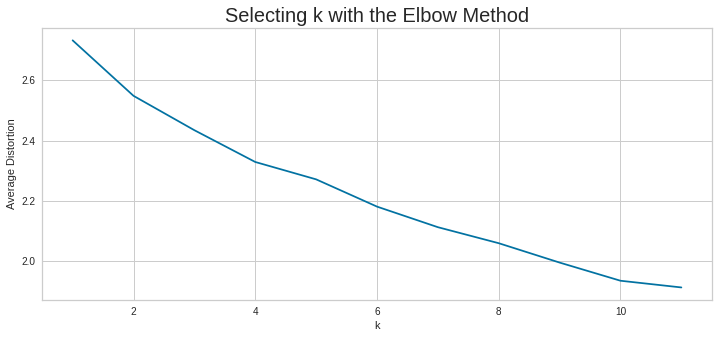

In [127]:
clusters = range(1, 12)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(stockDataScaled)
    prediction = model.predict(stockDataScaled)
    distortion = (
        sum(
            np.min(cdist(stockDataScaled, model.cluster_centers_, "euclidean"), axis=1)
        )
        / stockDataScaled.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.figure(figsize=(12,5))
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

* There is no clear elbow-point for k as the the plot is more of a curve
* The appropriate value of k from the elbow curve seems to be 5 or 6.

For n_clusters = 2, silhouette score is 0.41968539433233715
For n_clusters = 3, silhouette score is 0.4314884813364627
For n_clusters = 4, silhouette score is 0.40271940448338456
For n_clusters = 5, silhouette score is 0.3410572669134817
For n_clusters = 6, silhouette score is 0.3681643245098012
For n_clusters = 7, silhouette score is 0.33745692142442146
For n_clusters = 8, silhouette score is 0.3674559020229355
For n_clusters = 9, silhouette score is 0.2080052050343669
For n_clusters = 10, silhouette score is 0.13337664913008693
For n_clusters = 11, silhouette score is 0.13660758018937025


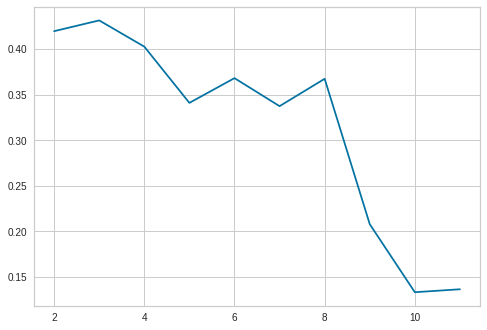

In [128]:
# To check the silhouette scores
sil_score = []
cluster_list = list(range(2, 12))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((stockDataScaled))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(stockDataScaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

* From the silhouette scores, it seems that 3 is a good value of k.

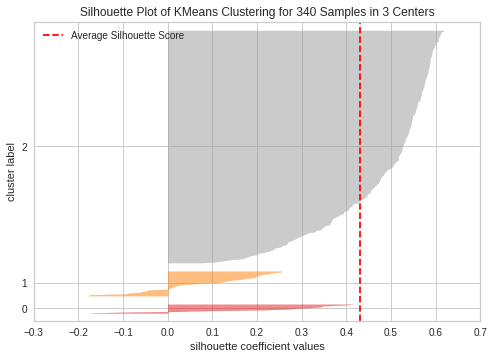

In [129]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(stockDataScaled)
visualizer.show()

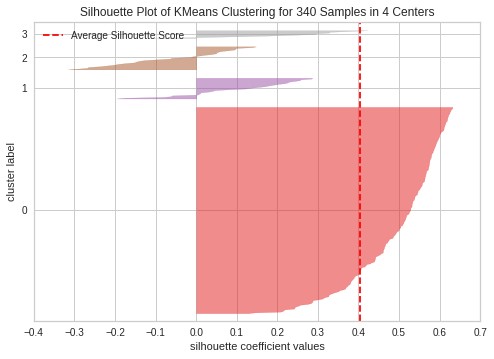

In [130]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(stockDataScaled)
visualizer.show()

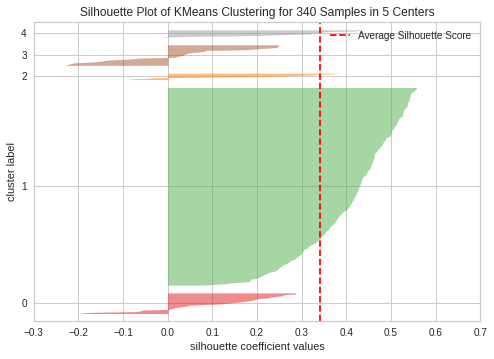

In [131]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(stockDataScaled)
visualizer.show()

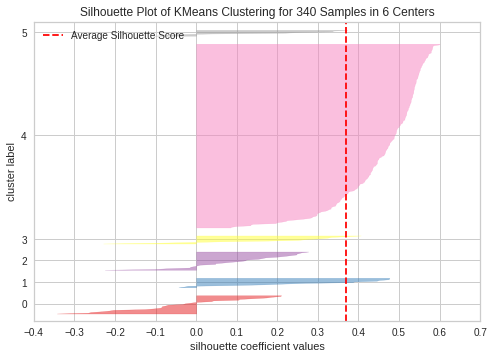

In [132]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(stockDataScaled)
visualizer.show()

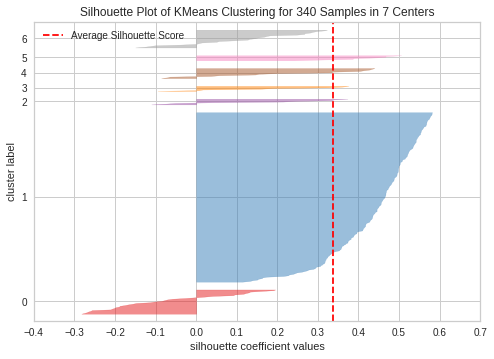

In [133]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(stockDataScaled)
visualizer.show()

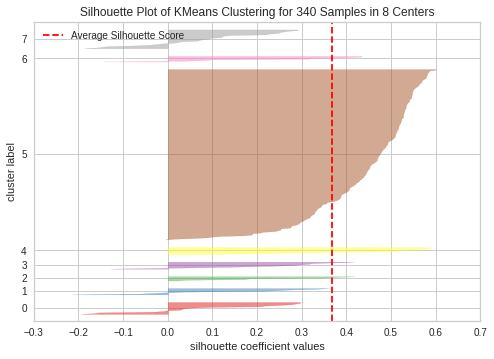

In [134]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(stockDataScaled)
visualizer.show()

* **It appears 8 is a better value for k as there are more clusters above the average distortion line and fewer negative values**

### Selecting final K-Means clustering model

In [135]:
kmeans = KMeans(n_clusters=8, random_state=1)
kmeans.fit(stockDataScaled)

KMeans(random_state=1)

In [136]:
# Adding kmeans cluster labels to the original dataframe
df["k_means_segments"] = kmeans.labels_

In [137]:
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,k_means_segments
0,AAL,American Airlines Group,Industrials,Airlines,42.35,10.00,1.69,135,51,-604000000,7610000000,11.39,668129938.50,3.72,-8.78,5
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.24,8.34,2.20,130,77,51000000,5144000000,3.15,1633015873.00,18.81,-8.75,5
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.91,11.30,1.27,21,67,938000000,4423000000,2.94,1504421769.00,15.28,-0.39,5
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.94,13.98,1.36,9,180,-240840000,629551000,1.26,499643650.80,74.56,4.20,0
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.32,-1.83,1.70,14,272,315120000,696878000,0.31,2247993548.00,178.45,1.06,7


### Cluster Profiling

In [138]:
cluster_profile = df.groupby("k_means_segments").mean()

In [139]:
cluster_profile["companies_in_each_segment"] = (
    df.groupby("k_means_segments")["Net Cash Flow"].count().values
)

In [140]:
# displaying cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,companies_in_each_segment
k_means_segments,,,,,,,,,,,,
0,84.093519,15.599815,1.829242,30.222222,310.333333,245414500.000000,1045285111.111111,2.260556,706209226.038889,34.989347,8.208513,18
1,440.470999,9.466350,1.492400,34.300000,127.500000,180117900.000000,1058580200.000000,10.981000,116346572.776000,55.108162,15.692852,10
2,30.970000,-19.480776,3.077855,212.857143,52.857143,-238354285.714286,-9472421142.857143,-22.572857,453477921.477143,73.809474,2.310341,7
3,50.517273,5.747586,1.130399,31.090909,75.909091,-1171727272.727273,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
4,71.598743,5.610675,1.165562,236.909091,50.454545,-156727545.454545,1543747363.636364,2.820909,524805403.504545,27.747208,-0.765320,11
5,68.461657,5.067450,1.376360,20.105691,50.983740,40534609.756098,1595011146.341463,3.663923,437499126.925691,21.986036,-1.858831,246
6,115.313334,2.203918,1.705743,46.111111,37.333333,-58033444.444444,1071429444.444444,4.046667,177261717.897778,20.286742,-51.805696,9
7,54.867500,-9.337123,2.453744,15.785714,68.535714,193729321.428571,-1011466035.714286,-2.422143,602141591.079286,95.138997,-0.339213,28


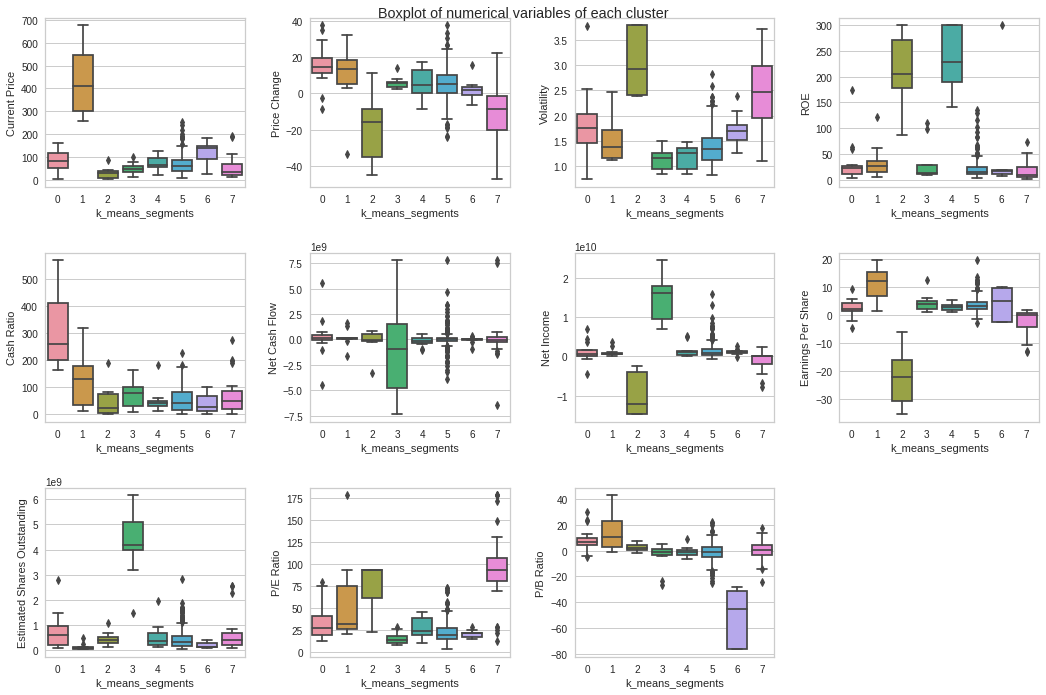

In [141]:
plt.figure(figsize=(15,10))
plt.suptitle("Boxplot of numerical variables of each cluster")

for i, variable in enumerate(num_cols):
  plt.subplot(3,4,i+1)
  sns.boxplot(data=df, x="k_means_segments", y=variable)

  plt.tight_layout(pad=2.0)


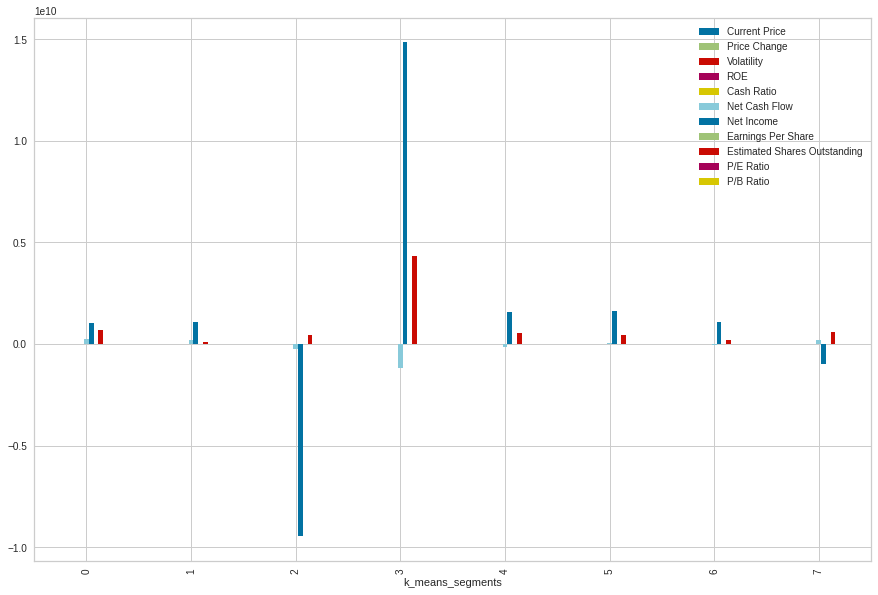

In [142]:
df.groupby("k_means_segments").mean().plot.bar(figsize=(15,10));

**K-Means cluster profiles**

* Group 0: These are companies with highest net cash flow and cash ratio, the have the highest share price appreciation and are looking the healthiest. The average share price is the third highest but not comparably much lower than the highest share price. These are companies that were likely start-ups or successful private companies that have recently gone public and are performing in their sector

* Group 1: With the highest share price, earnings per share and P/B ratio and the second highest net income and cash flow, these are likely the big established companies with proven track record of success

* Group 2: These companies have the most volatile stock having the second highest losses and a very negative cash flow. These are companies in decline that are losing investors quickly. These stocks should be approached with caution

* Group 3: These companies are likely expanding or investing in something new because despite having the highest net income they have the most negative cash flow. They have most number of shares likely because they used the market to raise more capital to support their cash flow or investment. Their P/B ratio being negative suggest that they are very undervalued. These companies should be shortlisted for investment

* Group 4: These are comapies with the highest return on equity. Although they have the third highest net income, their net cash flow is negative. Their high return on equity may be because the value of sharholder's equity have reduced due to debt refinancing. Thier P/B ratio is slightly in the negative suggesting that they are slightly undervalued. They should be closely monitored for future changes and opportunities

* Group 5: This group has the highest number of companies which are generally well-run. They have decent and positive net income and net cash flow, and they are undervalued. These group of companies are likely the companies most traded and most accessible to th regular investor looking for safe investment

* Group 6: These group of companies are similar to group 5 companies except that the seem to be expanding or investing in new projects or operations. This is because though their net income is positive, thier net cash flow is negative and they are the most undervalued stock. These companies should be shortlisted and closely examined

* Group 7: These companies have the highest price to earnings ratio. This suggest they have a poor returns for the year but ar likely to turn it around. They have a positive net cash flow and a negative income. Their negative P/B ratio suggest they still undervalued. 

## Hierarchical Clustering

### Checking Cophenetic Correlations

In [143]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(stockDataScaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(stockDataScaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.8972508041757037.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7805386719404724.
Cophenetic correlation for Euclidean distance and average linkage is 0.91512099001992.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.7223864671578856.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8816782001392466.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.5546195524031693.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8909882404347492.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8556401503556307.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8916627960336054.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7008541879386324.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9031751522768136.
Cophenetic corr

In [144]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.91512099001992, which is obtained with Euclidean distance and average linkage.


**Different linkage methods with Euclidean distance only will be explored**

In [145]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(stockDataScaled, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(stockDataScaled))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8972508041757037.
Cophenetic correlation for complete linkage is 0.7805386719404724.
Cophenetic correlation for average linkage is 0.91512099001992.
Cophenetic correlation for centroid linkage is 0.9161656094702941.
Cophenetic correlation for ward linkage is 0.7275426735476599.
Cophenetic correlation for weighted linkage is 0.7223864671578856.


In [146]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9161656094702941, which is obtained with centroid linkage.


**The cophenetic correlation is maximum with Euclidean distance and centroid linkage.**

### Checking Dendrograms

**The dendrograms for the different linkage methods**

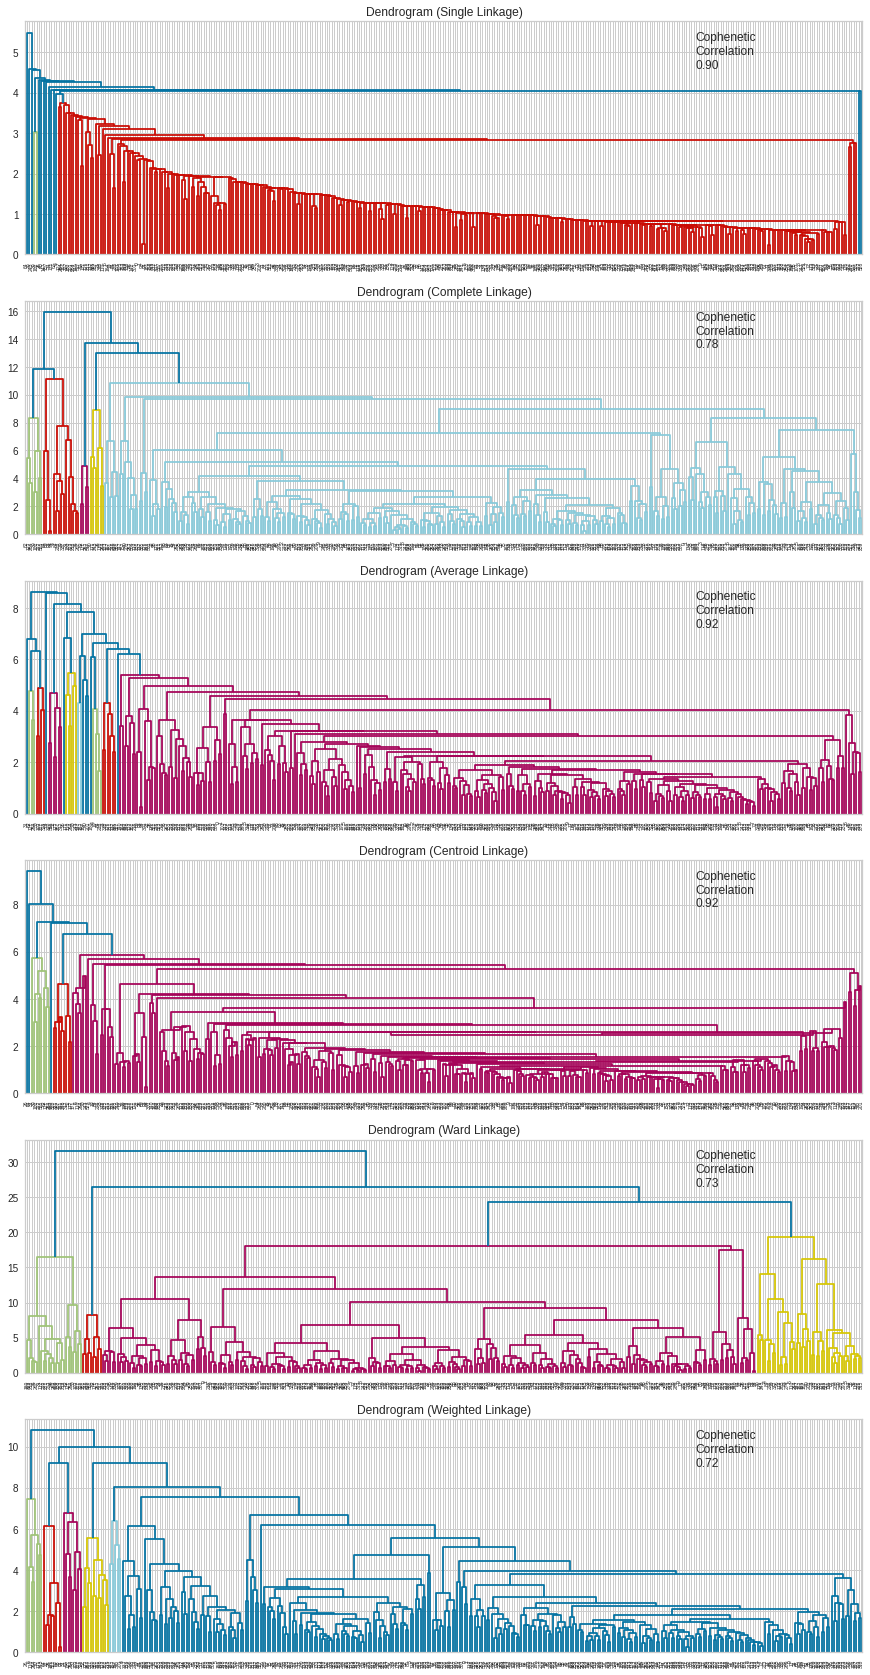

In [147]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(stockDataScaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(stockDataScaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

* The cophenetic correlation is highest for centroid linkage methods.
* From the Dendograms, the ward linkage method appears to have better defined clusters

* 9 appears to be the appropriate number of clusters from the dendrogram for ward linkage.

### Creating Model using sklearn

In [148]:
HCmodel = AgglomerativeClustering(n_clusters=9, affinity="euclidean", linkage="ward")
HCmodel.fit(stockDataScaled)

AgglomerativeClustering(n_clusters=9)

In [151]:
df = df.drop(["k_means_segments"], axis=1)

In [153]:
stockDataScaled["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

### Hierarchical Cluster Profiling

In [154]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [155]:
# let's see the names of the companies in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following company are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 2, the following company are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'AMETEK Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Aon plc' 'Amphenol Corp'
 'Arconic Inc' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 'Carnival Corp.' 'CF Industries Holdings Inc' 'Citizens Financial Group'
 'Church & Dwight' 

* There appear to be a good spread and clustering of companies. The smallest groups are not too thin


In [156]:
cluster_profile_1 = df.groupby("HC_Clusters").mean()

cluster_profile_1["companies_in_each_segment"] = (
    df.groupby("HC_Clusters")["Net Cash Flow"].count().values
)

In [157]:
# displaying cluster profiles
cluster_profile_1.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,companies_in_each_segment
HC_Clusters,,,,,,,,,,,,
0,299.171874,6.772348,1.630015,11.062500,122.687500,194205750.000000,504716125.000000,5.113125,291459071.265000,104.882918,6.139207,16
1,74.832064,20.177426,1.901638,25.619048,249.523810,219367857.142857,809692761.904762,1.898095,718432091.342857,36.481593,6.498339,21
2,70.526129,4.340021,1.383391,21.056911,51.735772,-9449983.739837,1619625910.569106,3.835793,439523478.295772,21.458521,-1.922448,246
3,38.791667,3.645595,1.649313,21.000000,133.000000,6667266666.666667,6833383333.333333,2.380000,1975113472.433333,29.630641,6.091450,6
4,30.970000,-19.480776,3.077855,212.857143,52.857143,-238354285.714286,-9472421142.857143,-22.572857,453477921.477143,73.809474,2.310341,7
5,50.744999,5.512605,1.070356,24.875000,60.250000,-3376750000.000000,15782875000.000000,3.632500,4640082627.625000,16.598649,-7.787061,8
6,72.211348,6.149885,1.211632,225.750000,57.583333,-110025250.000000,1469560083.333333,2.859167,497674770.287500,27.440784,-0.160230,12
7,111.996250,0.528510,1.762992,50.750000,40.625000,46137375.000000,958433125.000000,3.932500,149636166.510000,19.247735,-54.777344,8
8,35.530001,-14.896262,2.644750,18.937500,51.375000,-684277875.000000,-2051984562.500000,-4.826875,562597889.731250,86.694082,1.080465,16


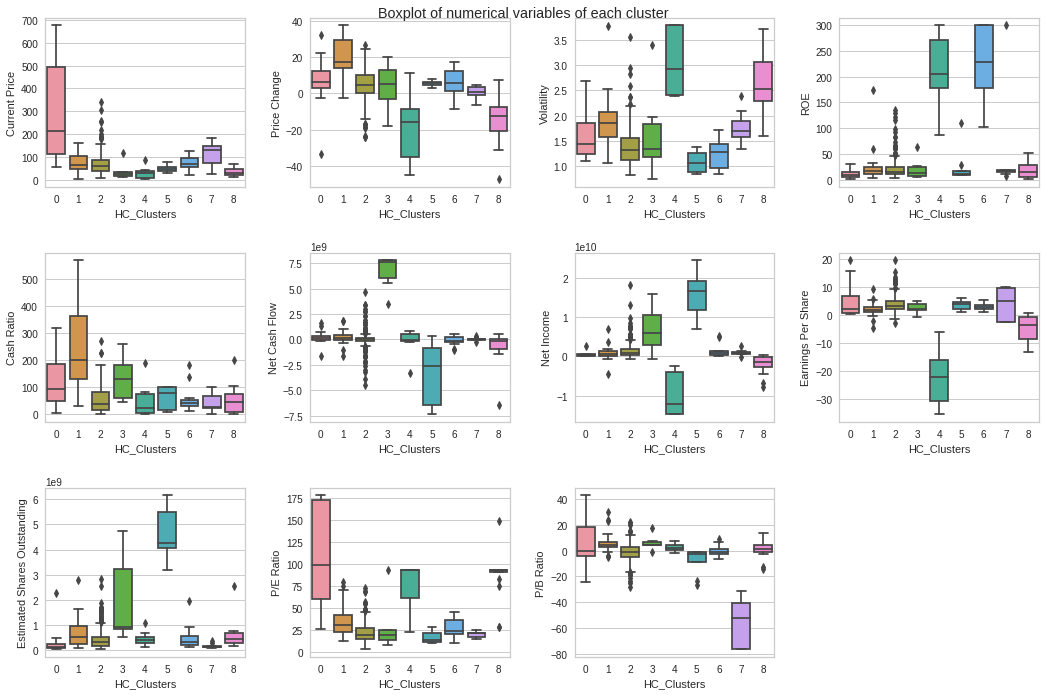

In [158]:
plt.figure(figsize=(15,10))
plt.suptitle("Boxplot of numerical variables of each cluster")

for i, variable in enumerate(num_cols):
  plt.subplot(3,4,i+1)
  sns.boxplot(data=df, x="HC_Clusters", y=variable)

  plt.tight_layout(pad=2.0)

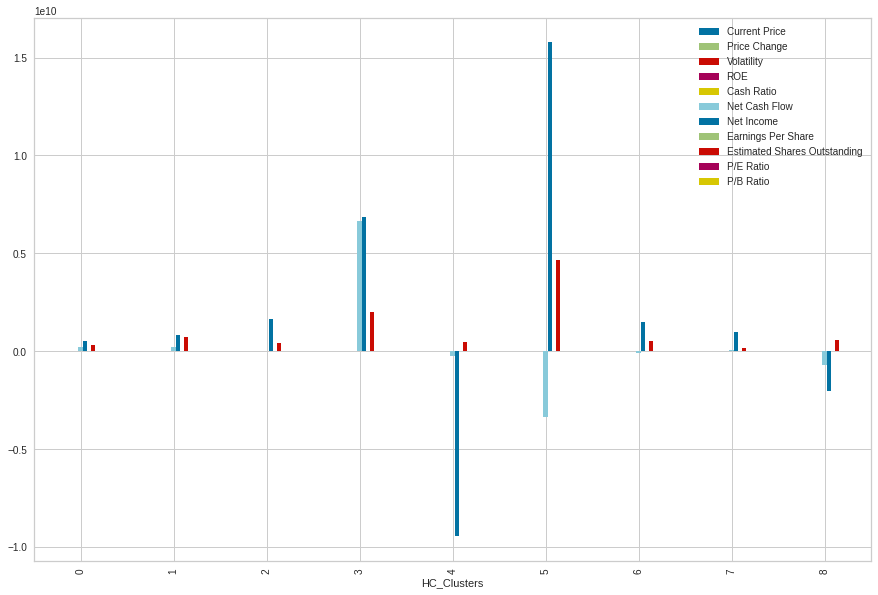

In [159]:
df.groupby("HC_Clusters").mean().plot.bar(figsize=(15,10));

**Hierarchical Cluster Profiles**

* Group 0: These companies have the highest share price, the highest earnings per share and the highest price per equity. These are likely the most desired companies with track record of performance which drives the demand for their stock. With a P/B ratio greater than 1, they are overvalued

* Group 1: These group of companies have the highest share price appreciation, highest cash ratio and the highest P/B ratio. These companies look healthy with positive net cash flow and net income. Though they appear to be companies on the rise they are the most overvalued

* Group 2: These group is the larget cluster with 246 companies. They have have decent performance with a positive net income. A negative net cash flow and a negative P/B ratio suggest either these companies are expanding or investing in new innovation. These companies should be shortlisted for close examination and monitoring 

* Group 3: These are companies with the highest net cash flow and a healthy positive net income. These companies have the second highest cash ratio. These are safe companies with strong financial performance and little debt

* Group 4: These are the poorest performing companies. The have negative net income and net cash flow, a the highest share price volatility. They should be avoided or examined with more scrutiny

* Group 5: These are companies the highest estimated shares outstanding, net income but a negative net cash flow. These are companies that may expanding or reinvesting and are the second most undervalued stocks. These companies may be goog for long term investments

* Group 6: These are comapies with the highest return on equity. Although they have the fourth highest net income, their net cash flow is negative. Their high return on equity may be because the value of sharholder's equity have reduced due to debt refinancing. Thier P/B ratio is slightly in the negative suggesting that they are slightly undervalued. They should be closely monitored for future changes and opportunities

* Group 7: These group of compncompanies are the most undervalued stock despite having the second highest share price. These are established companies that have even more opportunity to grow.

* Group 8: These are companies that are have the most negative net income. The also have a very negative net cash flow and price change. They appear to be companies on the decline. They are best avoided

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

* **The K-Means clustering method took less time to run than the hierarchical clustering method although the differences are not that much due to the size of the data**

* **The K-Means clusters are more defined and easier to described the difference between each cluster than the hierarchical clusters**

* **Hierarchical clusters have more spread of the observations than the K-Means clusters where one cluster had a larger amounts of the observations**

* **The K-Means clustering method had 8 clusters while the hierarchical clustering method had 9**

* **They both showed the high likelihood of misgrouping of observations**

* **The K-Means cluster group the poor performing companies better**



## Actionable Insights and Recommendations

- 

* The best opportunities for long term investment are Group 3 from the K-Means cluters and Group 5 from the hierarchical clusters

* The safest stock to invest are group 5 from the K-mean clusters and group 3 from the hierarchical clusters

* The stock to avoid are the group 2 from the K-mean clusters and group 2&7 from the hierarchical clusters